In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
import geopandas as gpd

# Editing the temperature file

In [6]:
temp_df = pd.read_csv('master_datasets/Temprature.csv', encoding= 'unicode_escape')
temp_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1990,1990,°C,0.766,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1992,1992,°C,-0.320,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1993,1993,°C,0.172,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1994,1994,°C,0.423,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1995,1995,°C,0.363,Fc,Calculated data


In [7]:
temp_df.Year.unique()

array([1990, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 1991,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [8]:
temp_df.Area.unique().shape

(247,)

In [9]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       2449 non-null   object 
 1   Domain            2449 non-null   object 
 2   Area Code         2449 non-null   int64  
 3   Area              2449 non-null   object 
 4   Element Code      2449 non-null   int64  
 5   Element           2449 non-null   object 
 6   Months Code       2449 non-null   int64  
 7   Months            2449 non-null   object 
 8   Year Code         2449 non-null   int64  
 9   Year              2449 non-null   int64  
 10  Unit              2449 non-null   object 
 11  Value             2338 non-null   float64
 12  Flag              2449 non-null   object 
 13  Flag Description  2449 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 268.0+ KB


In [10]:
temp_df.drop(['Domain Code', 'Domain', 'Area Code', 'Element Code', 
              'Element', 'Months Code', 'Months', 'Year Code', 'Unit',
              'Flag', 'Flag Description'
             ], 
             axis=1, inplace=True)
temp_df.rename(columns = {'Area':'Country', 'Value':'Temperature'}, 
               inplace = True)
temp_df['Year'] =  pd.to_datetime(temp_df['Year'], format='%Y')
temp_df.head(7)

,Country,Year,Temperature
0,Afghanistan,1990-01-01,0.766
1,Afghanistan,1992-01-01,-0.320
2,Afghanistan,1993-01-01,0.172
3,Afghanistan,1994-01-01,0.423
4,Afghanistan,1995-01-01,0.363
5,Afghanistan,1996-01-01,-0.106
6,Afghanistan,1997-01-01,0.480


In [11]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      2449 non-null   object        
 1   Year         2449 non-null   datetime64[ns]
 2   Temperature  2338 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 57.5+ KB


In [12]:
temp_df.Year.dt.year.unique().shape

(30,)

In [13]:
temp_df.Year.unique()

array(['1990-01-01T00:00:00.000000000', '1992-01-01T00:00:00.000000000',
       '1993-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2000-01-01T00:00:00.000000000',
       '1991-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01

In [14]:
temp_df.head(20)

,Country,Year,Temperature
0,Afghanistan,1990-01-01,0.766
1,Afghanistan,1992-01-01,-0.320
2,Afghanistan,1993-01-01,0.172
3,Afghanistan,1994-01-01,0.423
4,Afghanistan,1995-01-01,0.363
5,Afghanistan,1996-01-01,-0.106
6,Afghanistan,1997-01-01,0.480
7,Afghanistan,1998-01-01,0.669
8,Afghanistan,1999-01-01,1.178
9,Afghanistan,2000-01-01,0.996


The data is faulty. There are some years missing for some countries. 
First, we need to fill-in these 'missing' locations with NaNs, and then replace the NaNs later with the method of our choice.

In [15]:
temp_df.sort_values(by=['Country'], inplace=True, 
                    ascending=True, axis=0)

In [16]:
temp_df_countries = temp_df.Country.unique().tolist()
len(temp_df_countries)

247

In [17]:
# temp_df_countries

In [18]:
year_list = [i for i in range(1990, 2020)]
# year_list

# Using countries from the mapping library Geopandas

Because ultimately the 'Country' column has to be identical to the one in the mapping library to facilitate map-plotting

In [19]:
map_df = gpd.read_file('shape_files/Countries_WGS84.shp')

In [20]:
map_df.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [21]:
map_df.drop('OBJECTID', axis=1, inplace=True)
map_df.rename(columns = {'CNTRY_NAME':'Country'
                        },
              inplace = True)
map_df.head()

,Country,geometry
0,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [22]:
map_df.sort_values(by=['Country'], inplace=True, 
                   ascending=True, axis=0)

In [23]:
country_list = map_df.Country.unique().tolist()
len(country_list)

251

In [24]:
map_df2 = map_df
map_df2 = map_df2.astype(object)
map_df2.to_csv('datasets/geopandas_mapping.csv', encoding='utf-8', index=False)

In [25]:
# country_list

# Saving the important lists to csv files to allow for use later

In [26]:
print(len(year_list))
print(len(temp_df_countries))
print(len(country_list))

30
247
251


In [27]:
year_list_df = pd.DataFrame(year_list, columns=["Year"])
year_list_df.to_csv('datasets/year_list.csv', index=False)

In [28]:
temp_df_countries_df = pd.DataFrame(temp_df_countries, columns=["temp_df_countries"])
temp_df_countries_df.to_csv('datasets/temp_df_countries.csv', index=False)

In [29]:
country_list_df = pd.DataFrame(country_list, columns=["Country"])
country_list_df.to_csv('datasets/country_list.csv', index=False)

# Making a new dataframe

that will contain all countries from the map_df, and all the years from the year_list.
This will ensure there are no missing years in between.

In [30]:
def cartesian_product_simplified(left, right):
    la, lb = len(left), len(right)
    ia2, ib2 = np.broadcast_arrays(*np.ogrid[:la,:lb])

    return pd.DataFrame(
        np.column_stack([left.values[ia2.ravel()], right.values[ib2.ravel()]]))

In [31]:
new_df = cartesian_product_simplified(pd.DataFrame(country_list), pd.DataFrame(year_list))
new_df.head(34)

,0,1
0,Afghanistan,1990
1,Afghanistan,1991
2,Afghanistan,1992
3,Afghanistan,1993
4,Afghanistan,1994
5,Afghanistan,1995
6,Afghanistan,1996
7,Afghanistan,1997
8,Afghanistan,1998
9,Afghanistan,1999


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7530 entries, 0 to 7529
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7530 non-null   object
 1   1       7530 non-null   object
dtypes: object(2)
memory usage: 117.8+ KB


In [33]:
new_df.rename(columns = {0:'Country', 1:'Year'},
              inplace = True)  

In [34]:
new_df['Year'] = pd.to_datetime(new_df['Year'], format='%Y')

In [35]:
new_df.head()

,Country,Year
0,Afghanistan,1990-01-01
1,Afghanistan,1991-01-01
2,Afghanistan,1992-01-01
3,Afghanistan,1993-01-01
4,Afghanistan,1994-01-01


In [36]:
new_df.to_csv('datasets/country_year_list.csv', encoding='utf-8', index=False)

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7530 entries, 0 to 7529
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  7530 non-null   object        
 1   Year     7530 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 117.8+ KB


# Renaming the countries 

Renaming the countries in temp_df_countries to make them identical to those in the 'Country' column of the 'stacked' dataframe

In [40]:
temp_df2 = temp_df

In [41]:
temp_df2 = temp_df2.replace({'Country' : 'Bahamas'}, 'Bahamas, The')
temp_df2 = temp_df2.replace({'Country' : 'Belarus'}, 'Byelarus')
temp_df2 = temp_df2.replace({'Country' : 'Bolivia (Plurinational State of)'}, 'Bolivia')
temp_df2 = temp_df2.replace({'Country' : 'Brunei Darussalam'}, 'Brunei')
temp_df2 = temp_df2.replace({'Country' : 'Cabo Verde'}, 'Cape Verde')
temp_df2 = temp_df2.replace({'Country' : 'China, Macao SAR'}, 'Macau')
temp_df2 = temp_df2.replace({'Country' : 'China, Taiwan Province of'}, 'Taiwan')
temp_df2 = temp_df2.replace({'Country' : 'Democratic Republic of the Congo'}, 'Zaire')
temp_df2 = temp_df2.replace({'Country' : 'Czechoslovakia'}, 'Czech Republic')
temp_df2 = temp_df2.replace({'Country' : "Democratic People's Republic of Korea"}, 'North Korea')
temp_df2 = temp_df2.replace({'Country' : 'Eswatini'}, 'Swaziland')
temp_df2 = temp_df2.replace({'Country' : 'Falkland Islands (Malvinas)'}, 'Falkland Islands (Islas Malvinas)')
temp_df2 = temp_df2.replace({'Country' : 'Micronesia (Federated States of)'}, 'Federated States of Micronesia')
temp_df2 = temp_df2.replace({'Country' : 'French Guyana'}, 'French Guiana')
temp_df2 = temp_df2.replace({'Country' : 'French Southern Territories'}, 'French Southern & Antarctic Lands')
temp_df2 = temp_df2.replace({'Country' : 'Gambia'}, 'Gambia, The')
temp_df2 = temp_df2.replace({'Country' : 'Iran (Islamic Republic of)'}, 'Iran')
temp_df2 = temp_df2.replace({'Country' : 'Isle of Man'}, 'Man, Isle of')
temp_df2 = temp_df2.replace({'Country' : "Lao People's Democratic Republic"}, 'Laos')
temp_df2 = temp_df2.replace({'Country' : 'North Macedonia'}, 'Macedonia')
temp_df2 = temp_df2.replace({'Country' : 'Midway Island'}, 'Midway Islands')
temp_df2 = temp_df2.replace({'Country' : 'Republic of Moldova'}, 'Moldova')
temp_df2 = temp_df2.replace({'Country' : 'Myanmar'}, 'Myanmar (Burma)')
temp_df2 = temp_df2.replace({'Country' : 'Netherlands Antilles (former)'}, 'Netherlands Antilles')
temp_df2 = temp_df2.replace({'Country' : 'Pacific Islands Trust Territory'}, 'Pacific Islands (Palau)')
temp_df2 = temp_df2.replace({'Country' : 'Pitcairn'}, 'Pitcairn Islands')
temp_df2 = temp_df2.replace({'Country' : 'Réunion'}, 'Reunion')
temp_df2 = temp_df2.replace({'Country' : 'Russian Federation'}, 'Russia')
temp_df2 = temp_df2.replace({'Country' : 'Republic of Korea'}, 'South Korea')
temp_df2 = temp_df2.replace({'Country' : 'Saint Helena, Ascension and Tristan da Cunha'}, 'St. Helena')
temp_df2 = temp_df2.replace({'Country' : 'Saint Kitts and Nevis'}, 'St. Kitts and Nevis')
temp_df2 = temp_df2.replace({'Country' : 'Saint Lucia'}, 'St. Lucia')
temp_df2 = temp_df2.replace({'Country' : 'Saint Pierre and Miquelon'}, 'St. Pierre and Miquelon')
temp_df2 = temp_df2.replace({'Country' : 'Saint Vincent and the Grenadines'}, 'St. Vincent and the Grenadines')
temp_df2 = temp_df2.replace({'Country' : 'Samao'}, 'Western Samao')
temp_df2 = temp_df2.replace({'Country' : 'South Georgia and the South Sandwich Islands'}, 'South Georgia and the South Sandwich Is')
temp_df2 = temp_df2.replace({'Country' : 'Svalbard and Jan Mayen Islands'}, 'Svalbard')
temp_df2 = temp_df2.replace({'Country' : 'Syrian Arab Republic'}, 'Syria')
temp_df2 = temp_df2.replace({'Country' : 'United Republic of Tanzania'}, 'Tanzania, United Republic of')
temp_df2 = temp_df2.replace({'Country' : 'United Kingdom of Great Britain and Northern Ireland'}, 'United Kingdom')
temp_df2 = temp_df2.replace({'Country' : 'United States Virgin Islands'}, 'Virgin Islands')
temp_df2 = temp_df2.replace({'Country' : 'United States of America'}, 'United States')
temp_df2 = temp_df2.replace({'Country' : 'Venezuela (Bolivarian Republic of)'}, 'Venezuela')
temp_df2 = temp_df2.replace({'Country' : 'Viet Nam'}, 'Vietnam')
temp_df2 = temp_df2.replace({'Country' : 'Wallis and Futuna Islands'}, 'Wallis and Futuna')

# Merging the dataframes

In [42]:
merged = pd.merge(new_df, temp_df2, how='left', left_on=['Country', 'Year'], right_on=['Country', 'Year'])
merged.head(34)

,Country,Year,Temperature
0,Afghanistan,1990-01-01,0.766
1,Afghanistan,1991-01-01,NaN
2,Afghanistan,1992-01-01,-0.320
3,Afghanistan,1993-01-01,0.172
4,Afghanistan,1994-01-01,0.423
5,Afghanistan,1995-01-01,0.363
6,Afghanistan,1996-01-01,-0.106
7,Afghanistan,1997-01-01,0.480
8,Afghanistan,1998-01-01,0.669
9,Afghanistan,1999-01-01,1.178


In [43]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7529
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      7530 non-null   object        
 1   Year         7530 non-null   datetime64[ns]
 2   Temperature  2199 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 235.3+ KB


In [44]:
merged.Country.unique().shape

(251,)

In [45]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total * 100 / len(df)
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total NaN','Percent Nan'])
    print (concat)
    print ( "-------------")
    
printNullValues(merged)

             Total NaN  Percent Nan
Temperature       5331    70.796813
-------------


# Filling in NaN values

Now filling in Nan values for the temperature by using the previous row value -- method is not flawless.
Median/mean value can also be used instead -- future use.
Linear/Multiple linear regression or machine learning could also be used to extrapolate the missing values of each missing year for a given country -- but all 251 countries will have to be considered separately, which is not possible in the scope of this project.

In [46]:
merged = merged.fillna(method='ffill')
merged.head(34)

,Country,Year,Temperature
0,Afghanistan,1990-01-01,0.766
1,Afghanistan,1991-01-01,0.766
2,Afghanistan,1992-01-01,-0.320
3,Afghanistan,1993-01-01,0.172
4,Afghanistan,1994-01-01,0.423
5,Afghanistan,1995-01-01,0.363
6,Afghanistan,1996-01-01,-0.106
7,Afghanistan,1997-01-01,0.480
8,Afghanistan,1998-01-01,0.669
9,Afghanistan,1999-01-01,1.178


In [47]:
printNullValues(merged)

Empty DataFrame
Columns: [Total NaN, Percent Nan]
Index: []
-------------


In [48]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7529
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      7530 non-null   object        
 1   Year         7530 non-null   datetime64[ns]
 2   Temperature  7530 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 235.3+ KB


# Making final dataset by merging with map_df for map coordinates column (Shape column)

In [49]:
final = pd.merge(merged, map_df, on='Country')

In [50]:
final.head(34)

,Country,Year,Temperature,geometry
0,Afghanistan,1990-01-01,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
1,Afghanistan,1991-01-01,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
2,Afghanistan,1992-01-01,-0.320,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Afghanistan,1993-01-01,0.172,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
4,Afghanistan,1994-01-01,0.423,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
5,Afghanistan,1995-01-01,0.363,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
6,Afghanistan,1996-01-01,-0.106,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
7,Afghanistan,1997-01-01,0.480,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
8,Afghanistan,1998-01-01,0.669,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
9,Afghanistan,1999-01-01,1.178,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."


In [51]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      7530 non-null   object        
 1   Year         7530 non-null   datetime64[ns]
 2   Temperature  7530 non-null   float64       
 3   geometry     7530 non-null   geometry      
dtypes: datetime64[ns](1), float64(1), geometry(1), object(1)
memory usage: 294.1+ KB


In [52]:
final.Temperature.min()

-1.358

In [53]:
final.Temperature.max()

2.476

In [54]:
0.77 - final.Temperature.min()

2.128

In [55]:
# setting min and max values for the colorbar - may like to normalise/log to scale everything

final['Temperature_normalised'] = final.Temperature - final.Temperature.min()

In [56]:
final.head(34)

,Country,Year,Temperature,geometry,Temperature_normalised
0,Afghanistan,1990-01-01,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124
1,Afghanistan,1991-01-01,0.766,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.124
2,Afghanistan,1992-01-01,-0.320,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",1.038
3,Afghanistan,1993-01-01,0.172,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",1.530
4,Afghanistan,1994-01-01,0.423,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",1.781
5,Afghanistan,1995-01-01,0.363,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",1.721
6,Afghanistan,1996-01-01,-0.106,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",1.252
7,Afghanistan,1997-01-01,0.480,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",1.838
8,Afghanistan,1998-01-01,0.669,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.027
9,Afghanistan,1999-01-01,1.178,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",2.536


In [57]:
final.Temperature_normalised.min()

0.0

In [58]:
final.Temperature_normalised.max()

3.834

In [59]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7529
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 7530 non-null   object        
 1   Year                    7530 non-null   datetime64[ns]
 2   Temperature             7530 non-null   float64       
 3   geometry                7530 non-null   geometry      
 4   Temperature_normalised  7530 non-null   float64       
dtypes: datetime64[ns](1), float64(2), geometry(1), object(1)
memory usage: 353.0+ KB


In [60]:
edited_master = final
edited_master = edited_master.astype(object)
edited_master.to_csv('datasets/EDITED_temperature.csv', encoding='utf-8', index=False)

In [61]:
# plotting the map will only work if this is run -- this converts the pandas dataframe to
# geopandas dataframe so that the choropleth can be plotted.
# One thing to keep in mind, a geopandas dataframe cannot be saved as a csv file.
# So, to save the final dataframe in a csv, it has to be converted to object data-type.

geometry = final.geometry
crs = {'init': 'epsg:4326'}
final = gpd.GeoDataFrame(final, crs=crs, geometry=geometry)

/Users/aman/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [62]:
final.Temperature_normalised.min()

0.0

In [63]:
final.Temperature_normalised.max()

3.834

In [64]:
edited_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7529
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 7530 non-null   object
 1   Year                    7530 non-null   object
 2   Temperature             7530 non-null   object
 3   geometry                7530 non-null   object
 4   Temperature_normalised  7530 non-null   object
dtypes: object(5)
memory usage: 353.0+ KB


In [65]:
edited_master.Year = pd.to_datetime(edited_master['Year'])
edited_master.Temperature = edited_master.Temperature.astype(float)
edited_master.Temperature_normalised = edited_master.Temperature_normalised.astype(float)
edited_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7530 entries, 0 to 7529
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Country                 7530 non-null   object        
 1   Year                    7530 non-null   datetime64[ns]
 2   Temperature             7530 non-null   float64       
 3   geometry                7530 non-null   object        
 4   Temperature_normalised  7530 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 353.0+ KB


# Plotting a single world map

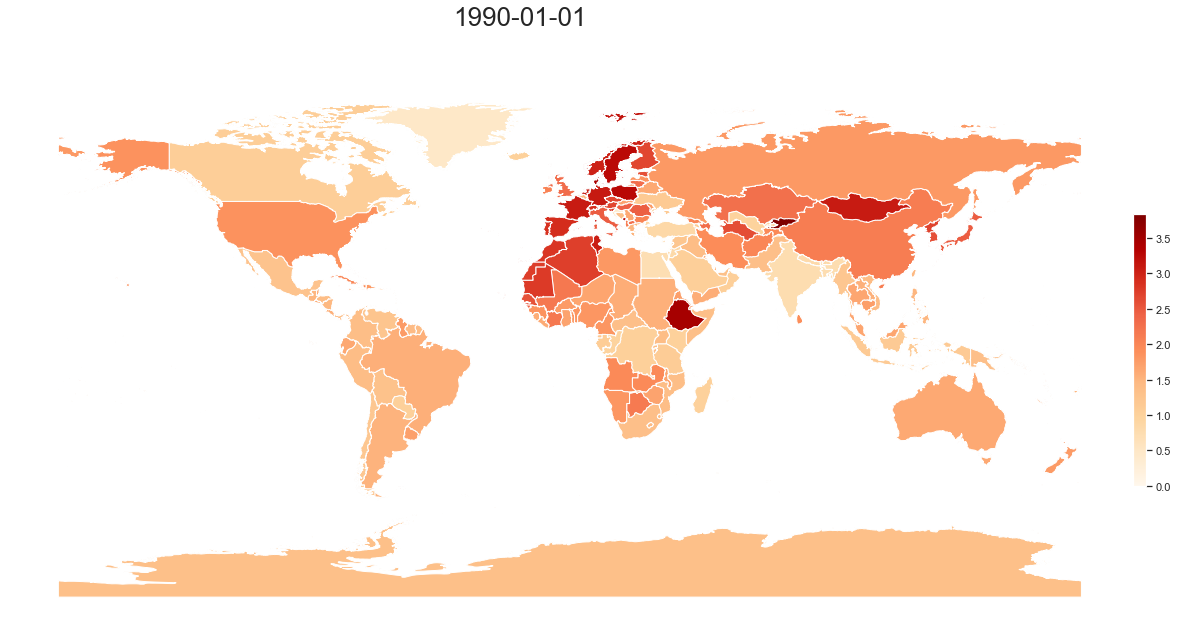

In [66]:
year_list_test = ['1990-01-01']

image_no = 0

fig, ax = plt.subplots(1, figsize=(30, 10))
variable = 'Temperature_normalised'

vmin, vmax = final.Temperature_normalised.min(), final.Temperature_normalised.max()

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, pad = 0.0001, shrink=0.5)


for i in range(0, len(year_list_test)):   
    year_for_mask = year_list_test[i]
    mask = (final['Year'] == year_for_mask)
    my_map = final.loc[mask]
    ax.axis('off')
    fig.suptitle(str(year_list_test[i]), fontsize=26, fontweight = 3)
    my_map.plot('Temperature_normalised', cmap='OrRd', ax=ax)
    fig.savefig('test_image_outputs/image_{image_no:04d}.png'.format(image_no=image_no), 
                dpi=300, bbox_inches='tight')
    image_no +=1

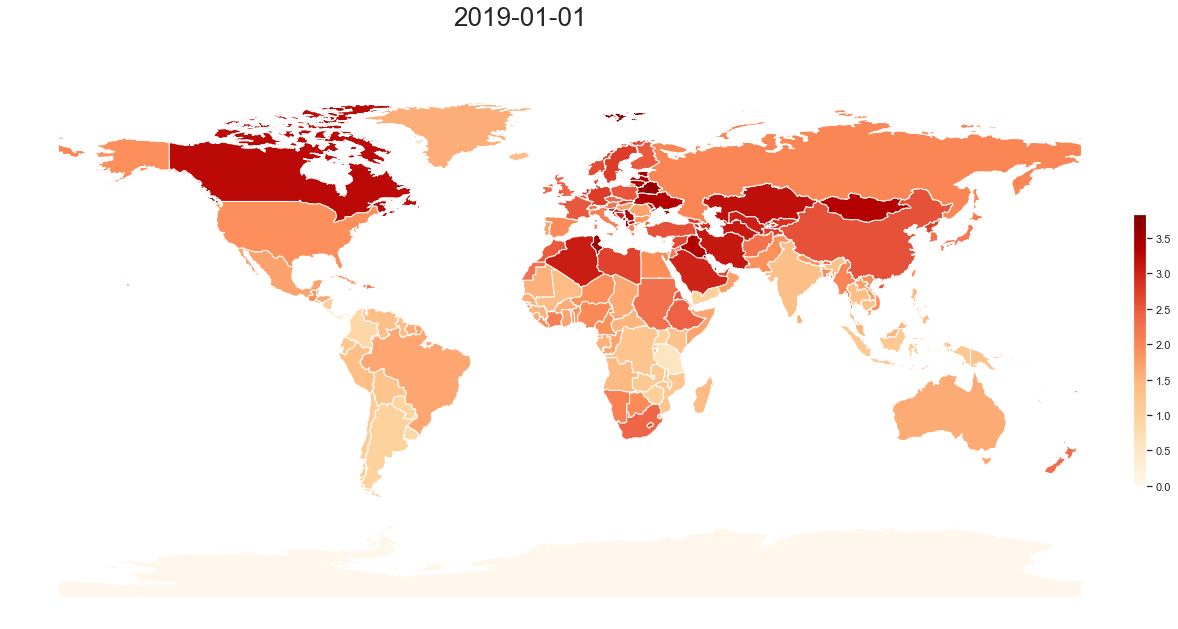

In [67]:
year_list_test = ['2019-01-01']

image_no = 1

fig, ax = plt.subplots(1, figsize=(30, 10))
variable = 'Temperature_normalised'

vmin, vmax = final.Temperature_normalised.min(), final.Temperature_normalised.max()

sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm, pad = 0.0001, shrink=0.5)


for i in range(0, len(year_list_test)):   
    year_for_mask = year_list_test[i]
    mask = (final['Year'] == year_for_mask)
    my_map = final.loc[mask]
    ax.axis('off')
    fig.suptitle(str(year_list_test[i]), fontsize=26, fontweight = 3)
    my_map.plot('Temperature_normalised', cmap='OrRd', ax=ax)
    fig.savefig('test_image_outputs/image_{image_no:04d}.png'.format(image_no=image_no), 
                dpi=300, bbox_inches='tight')
    image_no +=1